### Импорт библиотек

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

### Задание 1

1) Загрузите датасет “Титаник” 

In [22]:
titanic = pd.read_csv("./data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Видим, что датасет корректно загружен

### Задание 2

2) Проверьте наличие пропущенных значений и проанализируйте, в каких переменных они присутствуют.

In [23]:
print("Число отсутствующих значений: \n")
titanic.isnull().sum()

Число отсутствующих значений: 



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Видно, есть немного людей, возраст которых неизвестен (Age). У многих людей неизвестна каюта (Cabin), но при этом известен класс (Pclass). Есть два пропуска признака  порт (Embarked).

Можно сделать вывод, что пропуски носят случайный характер

### Задание 3

3) Проведите анализ выживаемости по полу, возрасту, классу билета и другим факторам, которые кажутся интересными.

In [24]:
titanic["Sex"] = titanic["Sex"].apply(lambda x: int(x == "male")) # Кодирование значений
del titanic["PassengerId"]

<Axes: title={'center': 'Тепловая карта корреляции'}>

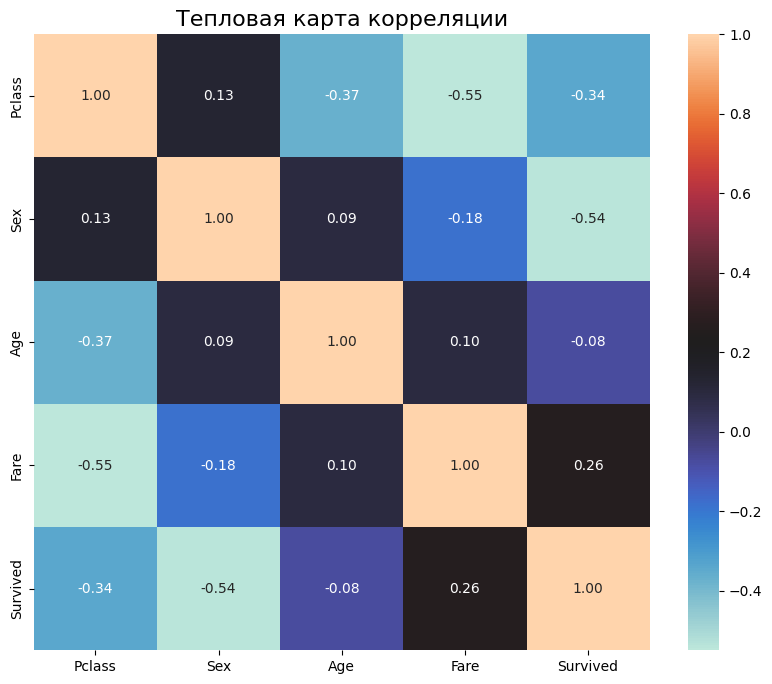

In [18]:
cov_matrix = titanic.loc[:,["Pclass", "Sex", "Age", "Fare", "Survived"]].corr()
plt.figure(figsize=(10, 8))
plt.title("Тепловая карта корреляции", fontsize=16)
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='icefire', square=True)

Судя по диаграмме можно предположить, что признак пола немного коррелирует с выживаемостью - женщин вижило больше, однако, стоит учитывать, что мужчин в целом на корабле было больше. Чтобы получить более содержательную оценку, можно посчитать относительный процент выживаемость по каждой категории.

In [71]:
survived_group = titanic.groupby(["Sex"]).agg(
    SurvivedProcent=('Survived', 'mean')
)
survived_group["SurvivedProcent"] = survived_group["SurvivedProcent"].apply(lambda x: f"{round(100*x)}%")
print("Относительная выживаемость в разрезе пола")
print(survived_group)
print()

survived_group = titanic.groupby(["Pclass"]).agg(
    SurvivedProcent=('Survived', 'mean')
)
survived_group["SurvivedProcent"] = survived_group["SurvivedProcent"].apply(lambda x: f"{round(100*x)}%")
print("Относительная выживаемость в разрезе класса каюты")
print(survived_group)
print()

bins = 6
max_age = titanic["Age"].max()
min_age = titanic["Age"].min()
k = (max_age - min_age)/bins # разбиваем возраст на категории

titanic["AgeBins"] = titanic["Age"].apply(lambda x: f"{(x//k)*(k):.00f}-{((x//k)+1)*(k):.00f}") # диапазон возраста
survived_group = titanic.groupby(["AgeBins"]).agg(
    SurvivedProcent=('Survived', 'mean')
)
survived_group["SurvivedProcent"] = survived_group["SurvivedProcent"].apply(lambda x: f"{round(100*x)}%")
print("Относительная выживаемость в разрезе возраста")
print(survived_group)
print()

Относительная выживаемость в разрезе пола
    SurvivedProcent
Sex                
0               74%
1               19%

Относительная выживаемость в разрезе класса каюты
       SurvivedProcent
Pclass                
1                  63%
2                  47%
3                  24%

Относительная выживаемость в разрезе возраста
        SurvivedProcent
AgeBins                
0-13                59%
13-27               35%
27-40               43%
40-53               40%
53-66               35%
66-80                0%
80-93              100%
nan-nan             29%



Теперь хорошо видно, что наибольшая вероятность выжить у:  
1. женщин,   
2. детей в возрасте до 13 лет, 
3. стариков в возрасте более 80 лет,  
4. пассажиров первого класса.

In [83]:
survived_group = titanic.groupby(["Embarked"]).agg(
    SurvivedProcent=('Survived', 'mean')
)
survived_group["SurvivedProcent"] = survived_group["SurvivedProcent"].apply(lambda x: f"{round(100*x)}%")
print("Относительная выживаемость в разрезе порта посадки")
print(survived_group)
print()

survived_group = titanic.groupby(["SibSp"]).agg(
    SurvivedProcent=('Survived', 'mean')
)
survived_group["SurvivedProcent"] = survived_group["SurvivedProcent"].apply(lambda x: f"{round(100*x)}%")
print("Относительная выживаемость в разрезе количества братьев\сестёр на борту")
print(survived_group)
print()

Относительная выживаемость в разрезе порта посадки
         SurvivedProcent
Embarked                
C                    55%
Q                    39%
S                    34%

Относительная выживаемость в разрезе количества братьев\сестёр на борту
      SurvivedProcent
SibSp                
0                 35%
1                 54%
2                 46%
3                 25%
4                 17%
5                  0%
8                  0%



Большиий процент выжило среди тех, кто сел в порте С. Также больше вероятность выжить, если у вас есть 1-2 брата и (или) сестры на борту.

### Задание 4

4) Разделите данные на признаки и целевую переменную, а затем на обучающую и тестовую выборки (80% на 20%).

In [89]:
X = titanic[['Sex', 'Age', 'Fare']]
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Разбили данные в соотношении 20\80

### Задание 5

5) Постройте модель дерева решений (DecisionTreeClassifier) для предсказания выживаемости пассажиров на основе признаков: пол, возраст, стоимость билета.

In [91]:

dt = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}


Обучил дереья и выполнил поиск оптимальных гиперпараметров по сетке

### Задание 6

6) Оцените модель с помощью метрик: accuracy, precision, recall, F1-score. Постройте матрицу ошибок.

Accuracy: 0.72
Precision: 0.66
Recall: 0.57
F1-score: 0.61


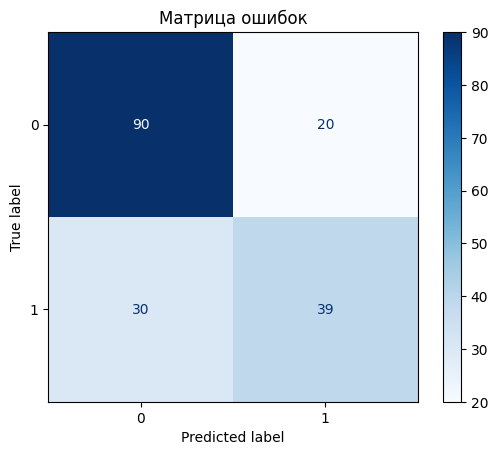

In [96]:
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.02f}")
print(f"Precision: {precision_score(y_test, y_pred):.02f}")
print(f"Recall: {recall_score(y_test, y_pred):.02f}")
print(f"F1-score: {f1_score(y_test, y_pred):.02f}")

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.title("Матрица ошибок")
plt.show()


Метрики получились не самые лучшие, что говорит о низкой обобщающей способности модели. Такая модель немного лучше константной. 